In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

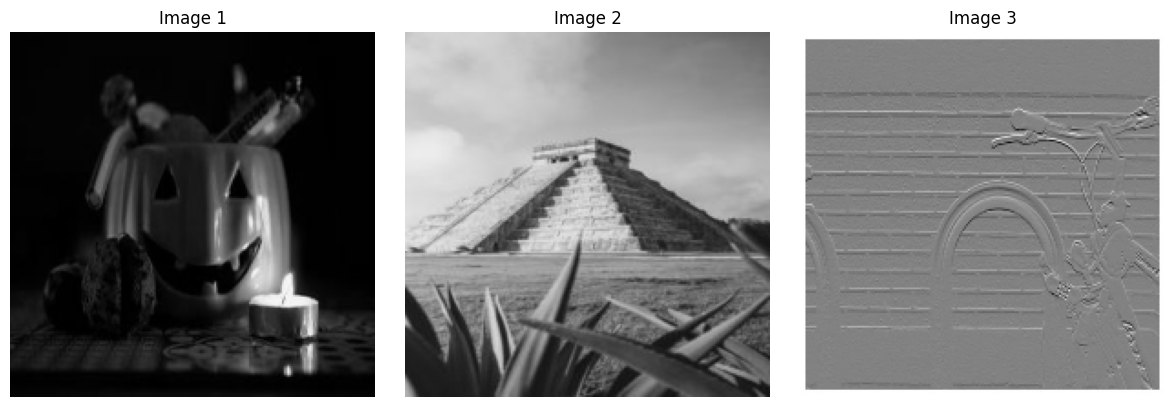

In [37]:
# Read the images
image1 = cv2.imread('/content/2.jpeg',0)
image2 = cv2.imread('/content/3.jpeg',0)
image3 = cv2.imread('/content/4.jpg',0)

# Resize images to a standard size (e.g., 200x200)
width, height = 200, 200
image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))
image3 = cv2.resize(image3, (width, height))

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the first image
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

# Display the second image
axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 2')
axes[1].axis('off')

# Display the third image
axes[2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axes[2].set_title('Image 3')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [38]:
# Apply Canny edge detection
canny_img1 = cv2.Canny(image1, 100, 200)
canny_img2 = cv2.Canny(image2, 100, 200)
canny_img3 = cv2.Canny(image3, 100, 200)

In [39]:
# Apply Hough Transform
def apply_hough(image):
    edges = cv2.Canny(image, 100, 200)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is not None:
        lines = lines.squeeze()
        for rho, theta in lines:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image

hough_img1 = apply_hough(image1)
hough_img2 = apply_hough(image2)
hough_img3 = apply_hough(image3)

In [40]:
# Apply Laplacian Edge Detection
laplacian_img1 = cv2.Laplacian(image1, cv2.CV_8U)
laplacian_img1 = cv2.cvtColor(laplacian_img1, cv2.COLOR_GRAY2RGB)

laplacian_img2 = cv2.Laplacian(image2, cv2.CV_8U)
laplacian_img2 = cv2.cvtColor(laplacian_img2, cv2.COLOR_GRAY2RGB)

laplacian_img3 = cv2.Laplacian(image3, cv2.CV_8U)
laplacian_img3 = cv2.cvtColor(laplacian_img3, cv2.COLOR_GRAY2RGB)

In [41]:
# Apply edge detection using gradients (Sobel, Prewitt, Roberts)
def apply_gradient_operators(image):
    sobelx = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=5)

    prewittx = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3)
    prewitty = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=3)

    robertsx = cv2.filter2D(image, -1, np.array([[1, 0], [0, -1]]))
    robertsy = cv2.filter2D(image, -1, np.array([[0, 1], [-1, 0]]))

    return (
        cv2.cvtColor(sobelx, cv2.COLOR_GRAY2RGB),
        cv2.cvtColor(sobely, cv2.COLOR_GRAY2RGB),
        cv2.cvtColor(prewittx, cv2.COLOR_GRAY2RGB),
        cv2.cvtColor(prewitty, cv2.COLOR_GRAY2RGB),
        cv2.cvtColor(robertsx, cv2.COLOR_GRAY2RGB),
        cv2.cvtColor(robertsy, cv2.COLOR_GRAY2RGB),
    )

(
    sobelx1, sobely1, prewittx1, prewitty1, robertsx1, robertsy1
) = apply_gradient_operators(image1)
(
    sobelx2, sobely2, prewittx2, prewitty2, robertsx2, robertsy2
) = apply_gradient_operators(image2)
(
    sobelx3, sobely3, prewittx3, prewitty3, robertsx3, robertsy3
) = apply_gradient_operators(image3)

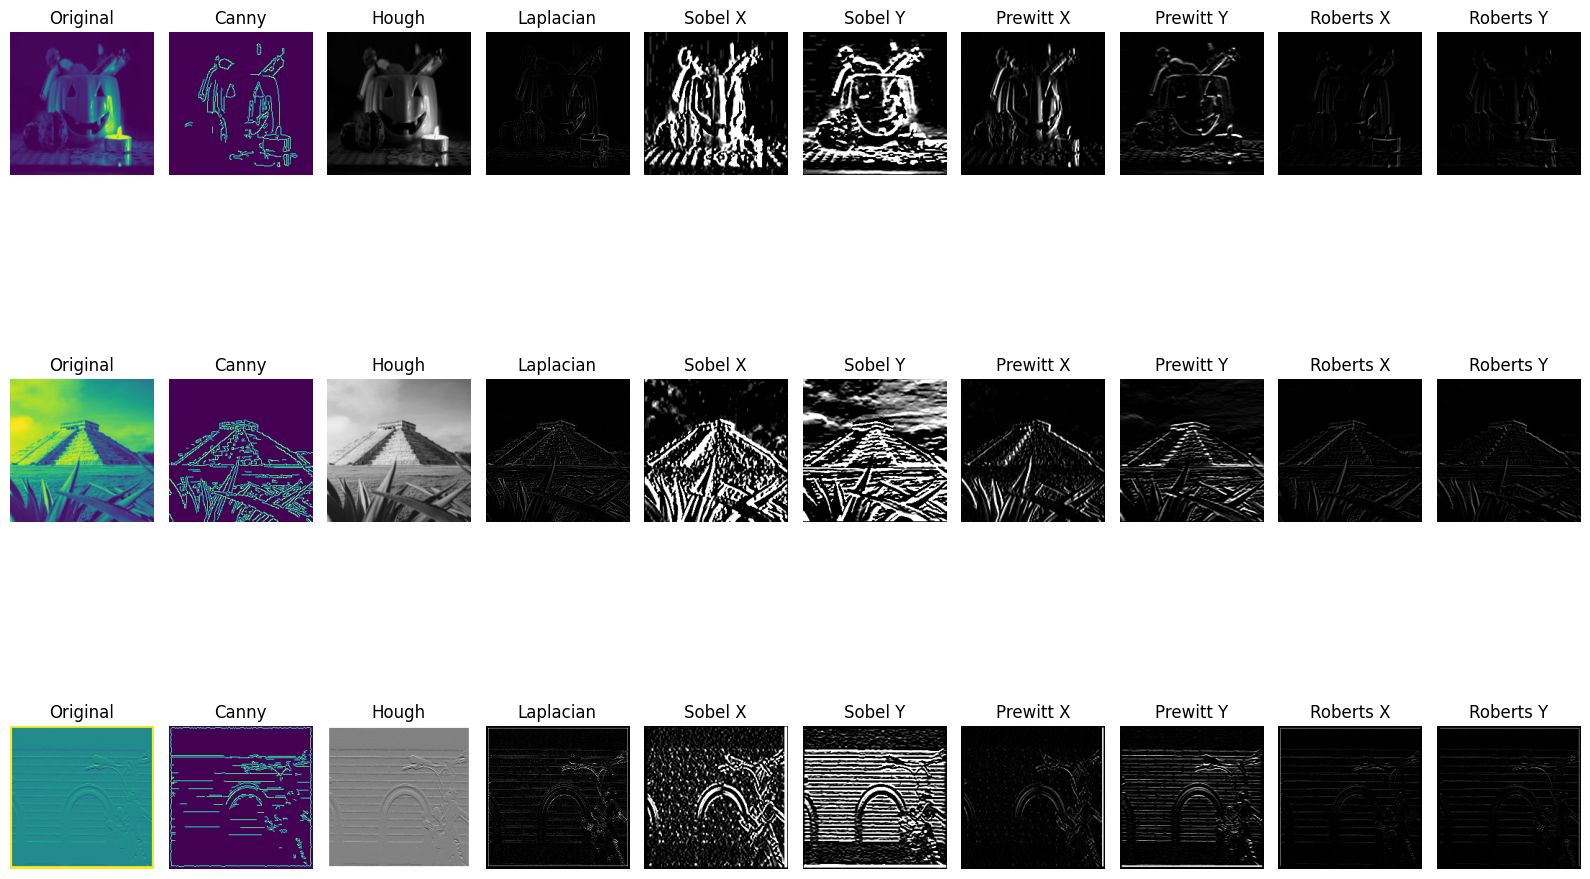

In [42]:
# Plotting the results
fig, axes = plt.subplots(3, 10, figsize=(16, 12))

# Titles for different methods
titles = [
    'Original',
    'Canny',
    'Hough',
    'Laplacian',
    'Sobel X',
    'Sobel Y',
    'Prewitt X',
    'Prewitt Y',
    'Roberts X',
    'Roberts Y',
]

# Display images
for i, img_set in enumerate(
    [
        [
            image1,
            canny_img1,
            hough_img1,
            laplacian_img1,
            sobelx1,
            sobely1,
            prewittx1,
            prewitty1,
            robertsx1,
            robertsy1,
        ],
        [
            image2,
            canny_img2,
            hough_img2,
            laplacian_img2,
            sobelx2,
            sobely2,
            prewittx2,
            prewitty2,
            robertsx2,
            robertsy2,
        ],
        [
            image3,
            canny_img3,
            hough_img3,
            laplacian_img3,
            sobelx3,
            sobely3,
            prewittx3,
            prewitty3,
            robertsx3,
            robertsy3,
        ],
    ]
):
    for j, img in enumerate(img_set):
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(titles[j])

plt.tight_layout()
plt.show()

**As is visible from these results, Canny and Sobel Y Edge Detection Methods perform significantly well.**